<a href="https://colab.research.google.com/github/ysy202202256/python/blob/main/CNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape, Dropout

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train/255.
X_test = X_test/255.

4422102/4422102 [==============================] - 0s 0us/step



Epoch 1: val_loss improved from inf to 0.59925, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.59925 to 0.51638, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.51638 to 0.43230, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.43230 to 0.40199, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.40199 to 0.38196, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.38196 to 0.36065, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.36065 to 0.34194, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.34194

Epoch 9: val_loss did not improve from 0.34194

Epoch 10: val_loss improved from 0.34194 to 0.31365, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss improved from 0.31365 to 0.31339, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 12: val_loss improved from

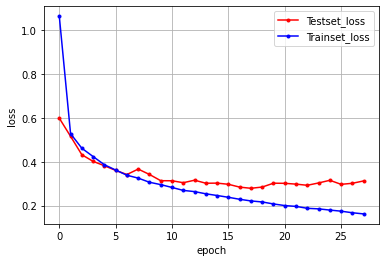

In [ ]:
model = Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


modelpath="./data/model/MNIST_CNN.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, verbose=0, batch_size=128, callbacks=[early_stopping_callback,checkpointer])


print("\n Test Accuracy : %.4f" %model.evaluate(X_test, y_test)[1])


y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()